In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
CELL_HEIGHT: int = 50

pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

DATA_URL: str = "https://dotlas-marketing.s3.amazonaws.com/interviews/california_restaurants.json"

In [3]:
df =  pd.read_json(DATA_URL)

In [182]:
df.head(1)
##print(type(df["menu"]))

,country,subregion,city,brand_name,categories,latitude,longitude,area,address,menu,description,public_transit,cross_street,restaurant_website,phone_number,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,entertainment,operating_hours,price_range_id,price_range,payment_options,maximum_days_advance_for_reservation,rating,rating_count,rating_by_feature,rating_distribution,review_count,review_topics,awards,experiences,tags,editorial_lists,checklist,safety_precautions,order_online_link,facebook,menu_url,popular_dishes,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],34.09751,-118.335921,Hollywood,"6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...","[{'name': 'Main Menu', 'sections': [{'name': '...","Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,http://www.luv2eatthai.com/,(323) 498-5835,Thai,Casual Dining,None,Street Parking,Casual Dress,None,Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...,2,$30 and under,"[AMEX, Discover, MasterCard, Visa]",90,4.6,136,"{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[2, 3, 4, 23, 104]",18,"[Spicy, Casual, Neighborhood Gem]",[],[],"[Delivery, Gluten-free Options, Late Night, No...",[],"{'bar': False, 'counter': False, 'gifting': No...","{'cleanMenus': None, 'limitedSeating': None, '...",None,http://www.facebook.com/luv2eatthaibistro/,http://sappclub.com/restaurant.aspx?r=205,[],NaN,1


In [77]:
##df.dtypes
df["restaurant_id"] = range(1, len(df) + 1)


In [43]:
df2 = df[df["subregion"]=='California']
df2.head(5)


0    []
1    []
Name: awards, dtype: object

In [5]:
#####   Solution 2.2.1  ###########

city_group= df.groupby("city", as_index=False).agg(restaurant_count = ('brand_name','count'),
                                                  avg_rating = ('rating','mean'),
                                                  avg_price_range_id = ('price_range_id','mean'),
                                                  avg_reservation_advance = ('maximum_days_advance_for_reservation','mean')).round(4)

city_group.sort_values(by="restaurant_count",ascending =False, inplace=True )
city_group.head(5)


,city,restaurant_count,avg_rating,avg_price_range_id,avg_reservation_advance
589,San Francisco,1645,2.5934,2.3617,90.3453
372,Los Angeles,1604,2.3200,2.2905,86.6920
586,San Diego,1034,2.6549,2.2872,94.5783
592,San Jose,372,1.5460,2.1640,88.3011
578,Sacramento,329,1.6866,2.2675,95.0274


In [6]:
#####   Solution 2.2.2  ###########

brand_group = df.groupby("brand_name", as_index=False).agg(restaurant_count = ('brand_name','count')).reset_index(drop=True)
brand_group.sort_values(by="restaurant_count",ascending =False, inplace=True )
brand_group.head(5)

,brand_name,restaurant_count
4211,Denny's,73
6836,Ihop,37
2165,Buffalo Wild Wings,32
1679,Black Bear Diner,28
3677,Coco's Bakery Restaurant,24



df2.head()

<AxesSubplot: xlabel='brand_name'>

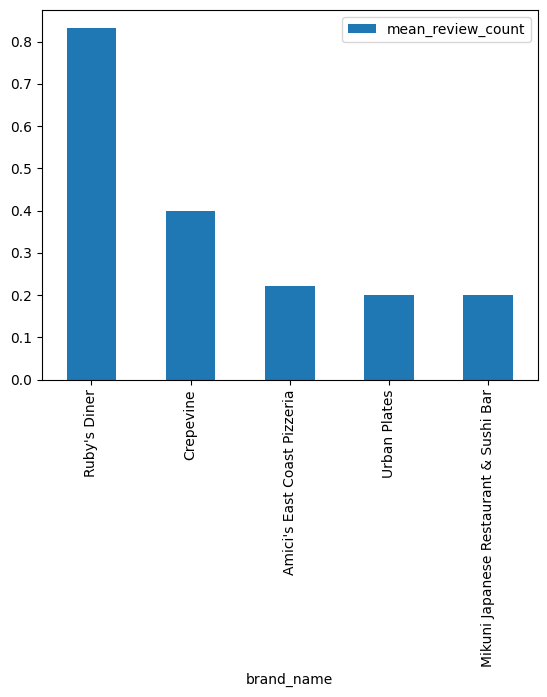

In [7]:
#####   Solution 2.2.3  ###########

top_df = df.groupby("brand_name", as_index=False).agg(restaurant_count = ('restaurant_id','count'),mean_review_count = ('review_count','mean'))
top_df.sort_values(by="mean_review_count",ascending =False, inplace=True )
top_df = top_df[top_df["restaurant_count"]>=5].head(5)
top_df.plot.bar(x='brand_name', y='mean_review_count')

In [8]:
#####################  Solution 2.3.1   #####################


dict4=df["safety_precautions"].to_dict()

dict5 = list(dict4.values())

safety=[]
for x in dict4.keys():
    keys = [k for k, v in dict4[x].items() if v == True]
    safety.append(keys)
    
df_new = df.copy()
for x in range(len(df_new)):
    df_new.at[x,'safety_precautions'] = safety[x]
    df_new['safety_precautions']=df_new['safety_precautions'].astype('object')
df_new.head(6)




,country,subregion,city,brand_name,categories,latitude,longitude,area,address,menu,description,public_transit,cross_street,restaurant_website,phone_number,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,entertainment,operating_hours,price_range_id,price_range,payment_options,maximum_days_advance_for_reservation,rating,rating_count,rating_by_feature,rating_distribution,review_count,review_topics,awards,experiences,tags,editorial_lists,checklist,safety_precautions,order_online_link,facebook,menu_url,popular_dishes,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],34.097510,-118.335921,Hollywood,"6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...","[{'name': 'Main Menu', 'sections': [{'name': '...","Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,http://www.luv2eatthai.com/,(323) 498-5835,Thai,Casual Dining,None,Street Parking,Casual Dress,None,Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...,2,$30 and under,"[AMEX, Discover, MasterCard, Visa]",90,4.6,136,"{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[2, 3, 4, 23, 104]",18,"[Spicy, Casual, Neighborhood Gem]",[],[],"[Delivery, Gluten-free Options, Late Night, No...",[],"{'bar': False, 'counter': False, 'gifting': No...",[],None,http://www.facebook.com/luv2eatthaibistro/,http://sappclub.com/restaurant.aspx?r=205,[],NaN,1
1,United States,California,Sherman Oaks,Jerry's Famous Deli,[American],34.154596,-118.448700,Sherman Oaks,None,"[{'name': 'Sample Menu', 'sections': [{'name':...",<p>Feast on delicious grub at Jerry's Famous D...,None,None,http://www.jerrysfamousdeli.com/,(818) 905-5774,American,Casual Dining,None,None,Business Casual,None,None,2,$30 and under,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...",[],None,None,None,[],NaN,2
2,United States,California,Pasadena,Terrace Sushi,[Spanish],34.145800,-118.142900,Pasadena,"443 E Colorado Blvd, , CA, Pasadena, 91101, Un...","[{'name': 'Main Menu', 'sections': [{'name': '...",<p>Terrace Sushi serves Japanese cuisines to i...,None,None,None,(626) 584-0503,Spanish,Casual Dining,None,None,Business Casual,None,None,2,$30 and under,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...",[],None,None,None,[],NaN,3
3,United States,California,Pasadena,Hamburger Hamlet - Pasadena,[Contemporary American],34.137800,-118.132300,Pasadena,"214 S Lake Ave, , CA, Pasadena, 91101, United ...","[{'name': 'Main Menu', 'sections': [{'name': '...",<p>Hamburger Hamlet serves traditional America...,None,None,None,(626) 449-8520,Contemporary American,Casual Dining,None,None,Business Casual,None,None,2,$30 and under,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...",[],None,None,None,[],NaN,4
4,United States,California,Burbank,Centanni - Burbank,[Italian],34.174018,-118.317323,Burbank,"117 N. Victory Blvd, , CA, Burbank, 91502, Uni...","[{'name': 'Main Menu', 'sections': [{'name': '...",<br />WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY...,None,Clark,http://www.centannila.com/,(818) 561-4643,Italian,Casual Dining,Marin Santos,Private Lot,Casual Dress,None,"Dinner\nMon–Thu 5:00 pm–8:30 pm\nFri, Sat 5:00...",2,$30 and under,"[AMEX, Discover, MasterCard, Visa]",90,4.7,83,"{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[0, 0, 7, 14, 62]",692,"[Neighborhood Gem, Casual, Good for a Date]","[{'name': 'Neighborhood Gem', 'location': 'San...",[],"[Beer, Corkage Fee, Delivery, Gluten-free Opti...",[],"{'bar': True, 'counter': False, 'gifting': Non...","[cleanMenus, prohibitSickStaff, requireDinerMa...",www.centannila.com,http://www.facebook.com/centannila,http://www.centannila.com/menu.html,"[{'name': 'Ravioli Di', 'description': 'pumpki...",1.0,5
5,United States,California,Sa

In [10]:
#####################  Solution 2.3.2   #####################

df.replace('<.*?>','',regex=True,inplace=True)
df.head(2)

,country,subregion,city,brand_name,categories,latitude,longitude,area,address,menu,description,public_transit,cross_street,restaurant_website,phone_number,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,entertainment,operating_hours,price_range_id,price_range,payment_options,maximum_days_advance_for_reservation,rating,rating_count,rating_by_feature,rating_distribution,review_count,review_topics,awards,experiences,tags,editorial_lists,checklist,safety_precautions,order_online_link,facebook,menu_url,popular_dishes,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],34.097510,-118.335921,Hollywood,"6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...","[{'name': 'Main Menu', 'sections': [{'name': '...","Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,http://www.luv2eatthai.com/,(323) 498-5835,Thai,Casual Dining,None,Street Parking,Casual Dress,None,Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...,2,$30 and under,"[AMEX, Discover, MasterCard, Visa]",90,4.6,136,"{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[2, 3, 4, 23, 104]",18,"[Spicy, Casual, Neighborhood Gem]",[],[],"[Delivery, Gluten-free Options, Late Night, No...",[],"{'bar': False, 'counter': False, 'gifting': No...","{'cleanMenus': None, 'limitedSeating': None, '...",None,http://www.facebook.com/luv2eatthaibistro/,http://sappclub.com/restaurant.aspx?r=205,[],NaN,1
1,United States,California,Sherman Oaks,Jerry's Famous Deli,[American],34.154596,-118.448700,Sherman Oaks,None,"[{'name': 'Sample Menu', 'sections': [{'name':...",Feast on delicious grub at Jerry's Famous Deli...,None,None,http://www.jerrysfamousdeli.com/,(818) 905-5774,American,Casual Dining,None,None,Business Casual,None,None,2,$30 and under,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...","{'cleanMenus': None, 'limitedSeating': None, '...",None,None,None,[],NaN,2


In [142]:
#####################  Solution 2.3.3   #####################

imputed_df = df[["restaurant_id","brand_name","area","city","rating"]]

imputed_df["imputed_rating_brand"] = imputed_df["rating"]

imputed_df.loc[imputed_df['imputed_rating_brand']  == 0, 'imputed_rating_brand'] = imputed_df.groupby('brand_name')['rating'].transform('median')
imputed_df["imputed_rating_area"] = imputed_df["imputed_rating_brand"]
imputed_df.loc[imputed_df['imputed_rating_area']  == 0, 'imputed_rating_area'] = imputed_df.groupby('area')['rating'].transform('median')
imputed_df["imputed_rating_city"] = imputed_df["imputed_rating_area"]
imputed_df.loc[imputed_df['imputed_rating_city']  == 0, 'imputed_rating_city'] = imputed_df.groupby('city')['rating'].transform('median')

imputed_df.head()

,restaurant_id,brand_name,area,city,rating,imputed_rating_brand,imputed_rating_area,imputed_rating_city
0,1,Luv2Eat Thai Bistro,Hollywood,Los Angeles,4.6,4.6,4.60,4.60
1,2,Jerry's Famous Deli,Sherman Oaks,Sherman Oaks,0.0,0.0,3.45,3.45
2,3,Terrace Sushi,Pasadena,Pasadena,0.0,0.0,3.90,3.90
3,4,Hamburger Hamlet - Pasadena,Pasadena,Pasadena,0.0,0.0,3.90,3.90
4,5,Centanni - Burbank,Burbank,Burbank,4.7,4.7,4.70,4.70


In [141]:
imputed_df.head()

,restaurant_id,brand_name,area,city,rating,imputed_rating_brand,imputed_rating_area,imputed_rating_city
0,1,Luv2Eat Thai Bistro,Hollywood,Los Angeles,4.6,4.6,4.60,4.60
1,2,Jerry's Famous Deli,Sherman Oaks,Sherman Oaks,0.0,0.0,3.45,3.45
2,3,Terrace Sushi,Pasadena,Pasadena,0.0,0.0,3.90,3.90
3,4,Hamburger Hamlet - Pasadena,Pasadena,Pasadena,0.0,0.0,3.90,3.90
4,5,Centanni - Burbank,Burbank,Burbank,4.7,4.7,4.70,4.70


In [42]:
############################## Solution 2.4 ###############

df_norm = df[["restaurant_id","menu"]].head(50)
df_norm = df_norm.explode('menu').reset_index(drop=True)
df_norm = df_norm.merge(pd.json_normalize(df_norm['menu']), left_index=True, right_index=True).drop('menu', axis=1)
df_norm = df_norm.explode('sections').reset_index(drop=True)
df_norm = df_norm.merge(pd.json_normalize(df_norm['sections']), left_index=True, right_index=True).drop('sections', axis=1)
df_norm = df_norm.explode('items').reset_index(drop=True)
df_norm = df_norm.merge(pd.json_normalize(df_norm['items']), left_index=True, right_index=True).drop('items', axis=1)
df_norm.head(5)


,restaurant_id,name_x,description_x,provider_name,name_y,description_y,name,description,price.value,price.currency_code,price
0,1,Main Menu,,NaN,Appetizers,,Egg Rolls,Deep fried mixed veggie egg rolls served with ...,8.0,USD,NaN
1,1,Main Menu,,NaN,Appetizers,,Fried Tofu,"(Contains Peanut) Deep fried tofu, served with...",8.0,USD,NaN
2,1,Main Menu,,NaN,Appetizers,,Fried Meat Balls,"Deep fried fish, pork, beef balls or mixed ser...",8.5,USD,NaN
3,1,Main Menu,,NaN,Appetizers,,Pork Jerky,Deep fried marinated pork served with special ...,8.5,USD,NaN
4,1,Main Menu,,NaN,Appetizers,,Thai Isaan Sausage,(Contains Peanut) Thai Style sausage served wi...,9.0,USD,NaN


In [268]:
################################  Solution 3.1.1  ###############################

# Note: The best resturant can not be decided only on the basis of avg rating, also we need need the total number of ratings provided,
# reviews provided by the customer,number of awards received by brand, price range etc. Below is the code.

df_test = df[["restaurant_id","brand_name","awards"]]
best_res = df.groupby("brand_name", as_index=False).agg(total_rating = ('rating_count','sum'),
                                                  avg_rating = ('rating','mean'),
                                                  total_review = ('review_count','sum'),      
                                                  avg_price_range_id = ('price_range_id','mean')).round(4)

df_awards = df.groupby(['brand_name']).apply(lambda x: x[x['awards'].str.len() != 0 ]['awards'].count()).reset_index(name='awards_count')
best_res = best_res.merge(df_awards, left_on='brand_name', right_on='brand_name')


In [269]:
best_res[best_res["awards_count"] > 1].head(50)

,brand_name,total_rating,avg_rating,total_review,avg_price_range_id,awards_count
1698,Blackbird,129,4.35,360,2.5,2
3528,Cielo,458,4.50,2480,3.0,2
8535,Locanda Positano,379,4.70,2388,2.5,2
14850,Tavern,296,4.55,785,2.0,2
15692,The Palms,290,4.35,1241,3.0,2
